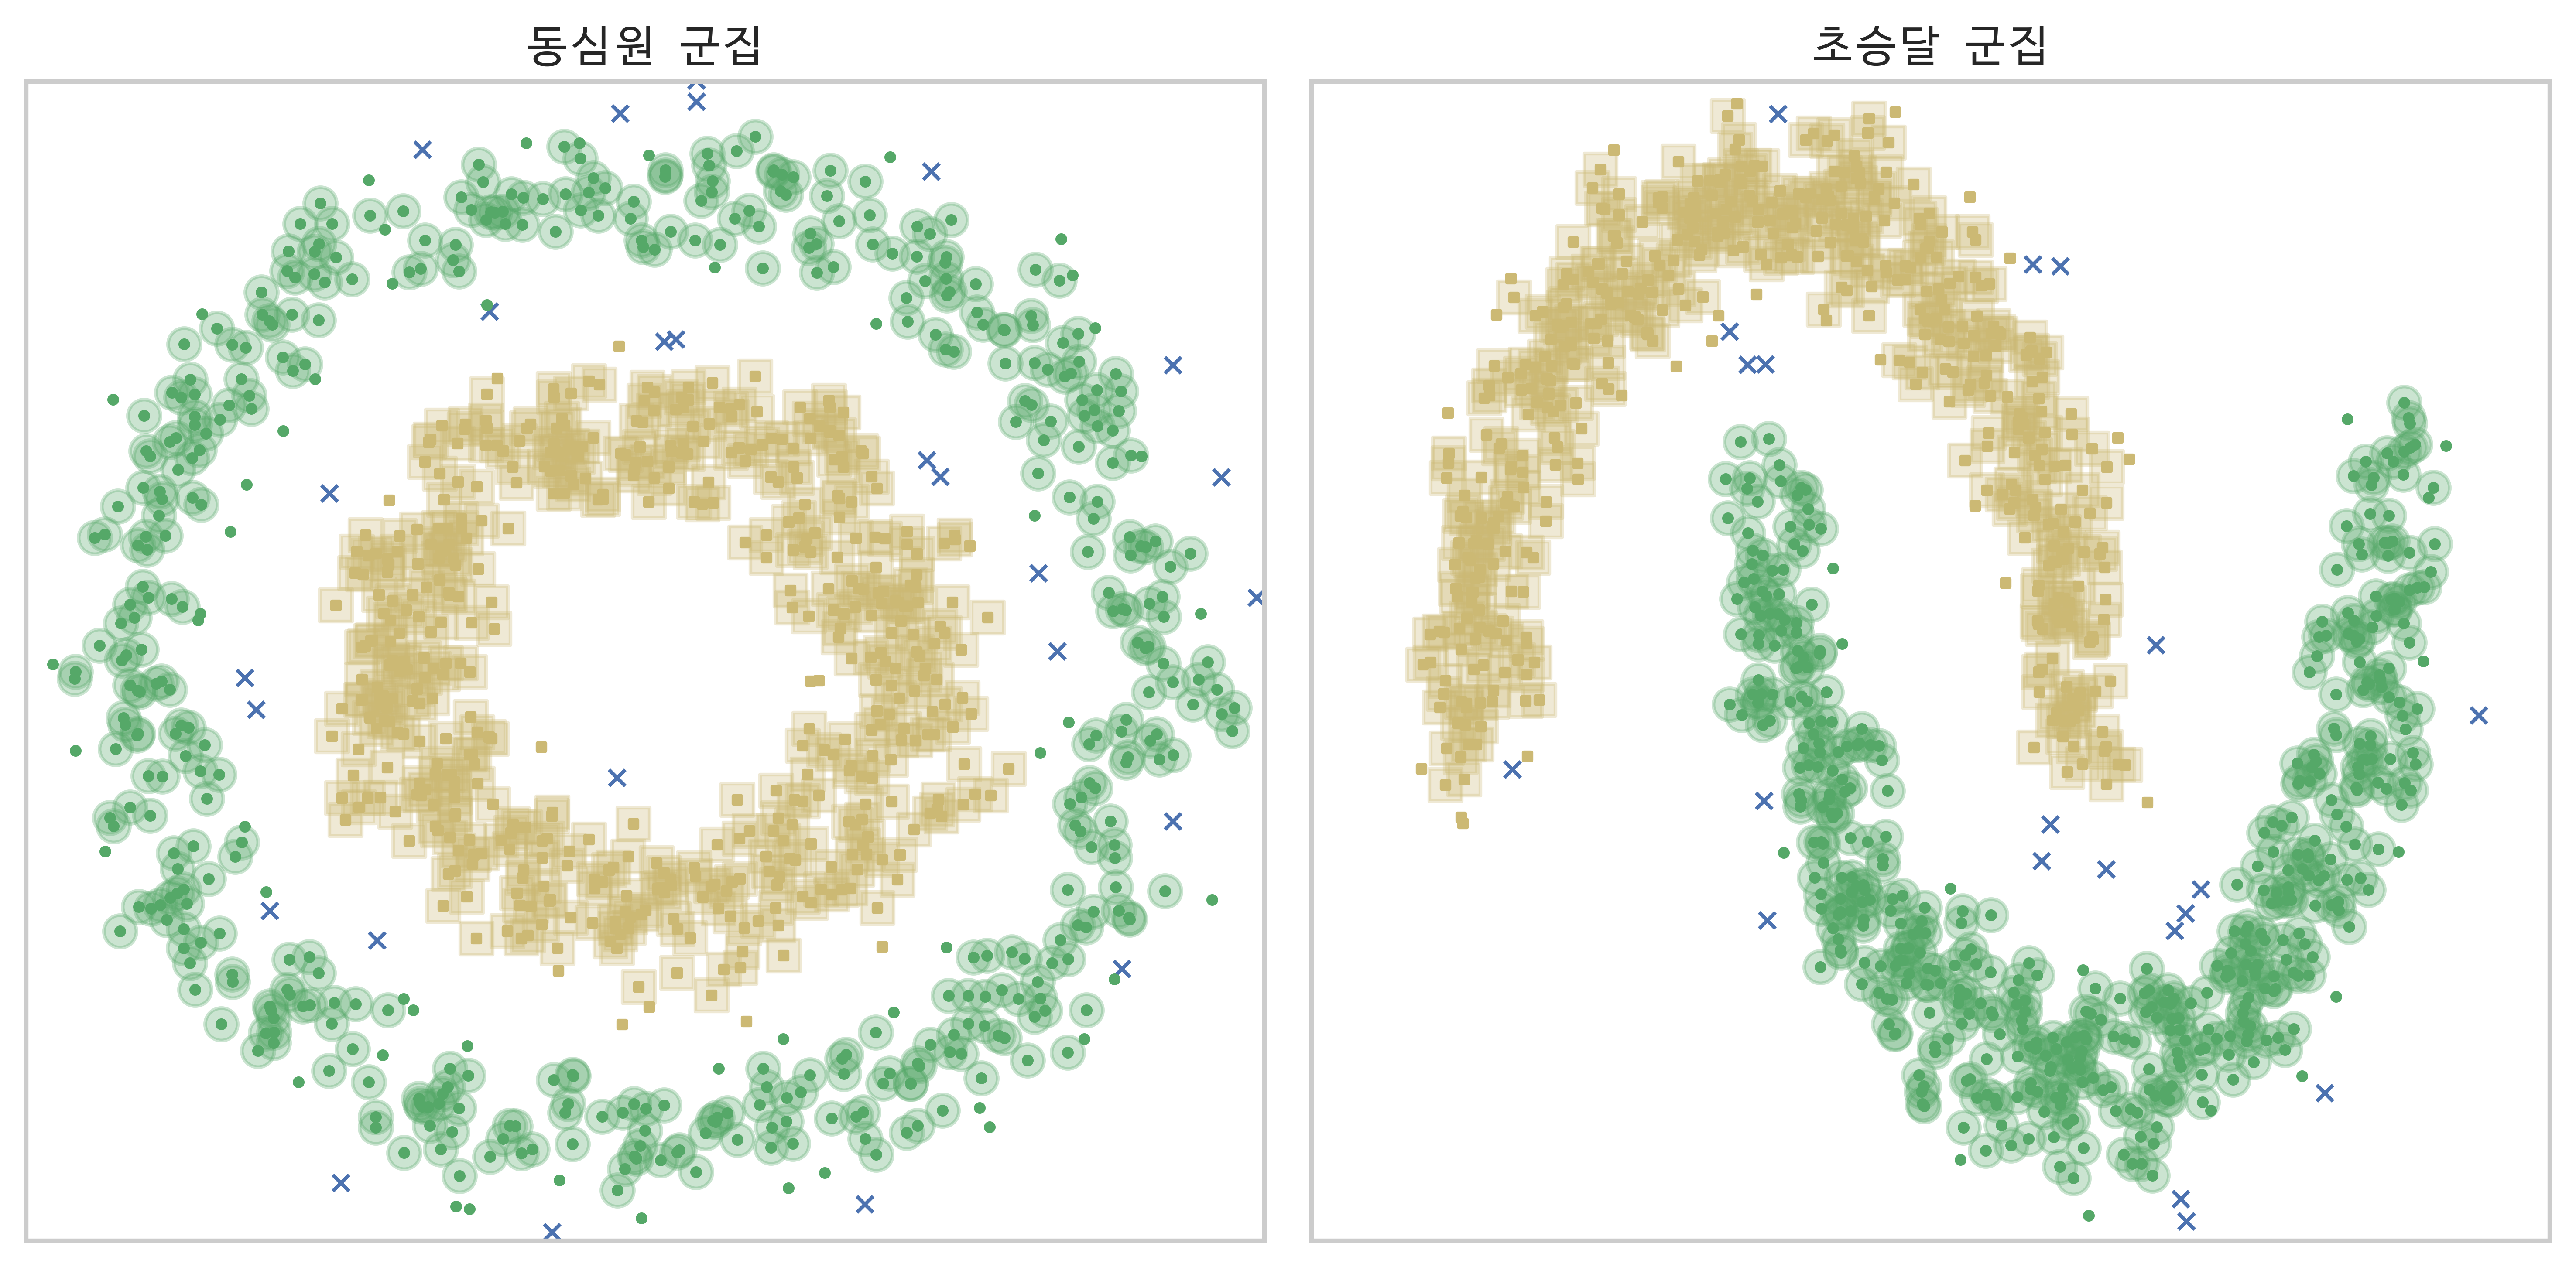

In [3]:
from sklearn.datasets import make_circles, make_moons
from sklearn.cluster import DBSCAN

n_samples = 1000
np.random.seed(2)
X1, y1 = make_circles(n_samples=n_samples, factor=0.5, noise=0.09)
X2, y2 = make_moons(n_samples=n_samples, noise=0.1)

def plot_DBSCAN(title, X, eps, xlim, ylim):
    model = DBSCAN(eps=eps)
    y_pred = model.fit_predict(X)
    idx_outlier = model.labels_ == -1
    plt.scatter(X[idx_outlier, 0], X[idx_outlier, 1], marker='x', lw=1, s=20)
    plt.scatter(X[model.labels_ == 0, 0], X[model.labels_ == 0, 1], marker='o', facecolor='g', s=5)
    plt.scatter(X[model.labels_ == 1, 0], X[model.labels_ == 1, 1], marker='s', facecolor='y', s=5)
    X_core = X[model.core_sample_indices_, :]
    idx_core_0 = np.array(list(set(np.where(model.labels_ == 0)[0]).intersection(model.core_sample_indices_)))
    idx_core_1 = np.array(list(set(np.where(model.labels_ == 1)[0]).intersection(model.core_sample_indices_)))
    plt.scatter(X[idx_core_0, 0], X[idx_core_0, 1], marker='o', facecolor='g', s=80, alpha=0.3)
    plt.scatter(X[idx_core_1, 0], X[idx_core_1, 1], marker='s', facecolor='y', s=80, alpha=0.3)
    plt.grid(False)
    plt.xlim(*xlim)
    plt.ylim(*ylim)
    plt.xticks([])
    plt.yticks([])
    plt.title(title)
    return y_pred

plt.figure(figsize=(10, 5))
plt.subplot(121)
y_pred1 = plot_DBSCAN('동심원 군집', X1, 0.1, (-1.2, 1.2), (-1.2, 1.2))
plt.subplot(122)
y_pred2 = plot_DBSCAN('초승달 군집', X2, 0.1, (-1.5, 2.5), (-0.8, 1.2))
plt.tight_layout()
plt.show()

In [4]:
from sklearn.metrics.cluster import adjusted_mutual_info_score, adjusted_rand_score

print('동심원 군집 ARI: ', adjusted_rand_score(y1, y_pred1))
print('동심원 군집 AMI: ', adjusted_mutual_info_score(y1, y_pred1))
print('초승달 군집 ARI: ', adjusted_rand_score(y2, y_pred2))
print('초승달 군집 AMI: ', adjusted_mutual_info_score(y2, y_pred2))

동심원 군집 ARI:  0.9414262371038592
동심원 군집 AMI:  0.8967648464619999
초승달 군집 ARI:  0.9544844153926417
초승달 군집 AMI:  0.9151495815452475


#### EX. 14.3.1

In [77]:
from sklearn.datasets import load_digits
digits = load_digits()
model = DBSCAN(eps=23.5, min_samples=17)
y_pred = model.fit_predict(digits.data)

print('군집의 갯수: ', len(np.unique(model.labels_)) - 1)
print('ARI: ', adjusted_rand_score(digits.target, y_pred))
print('AMI: ', adjusted_mutual_info_score(digits.target, y_pred))

군집의 갯수:  10
ARI:  0.5173067042792316
AMI:  0.726867685211598
